In [78]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
from Function import *
#plt.gray()


uint8
(4032, 3024, 3)


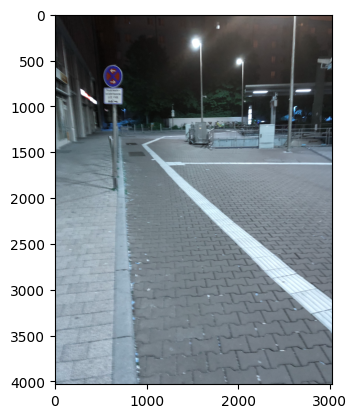

In [177]:
#klappt für:
#"C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\MucHbf.jpg"

#klappt nicht mit:
#"C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\MUC_BHF_2.jpg" 

image_path = "C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\MUC_BHF_5.jpg"
img = cv2.imread(image_path)
plt.imshow(img)

print(img.dtype)
print(img.shape)

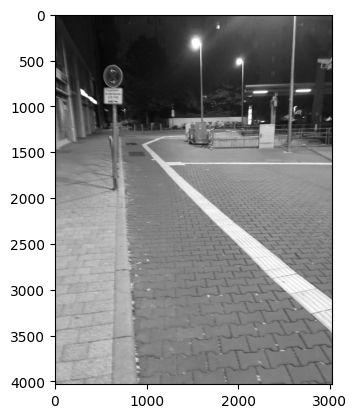

In [178]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.gray()

plt.imshow(gray_image)

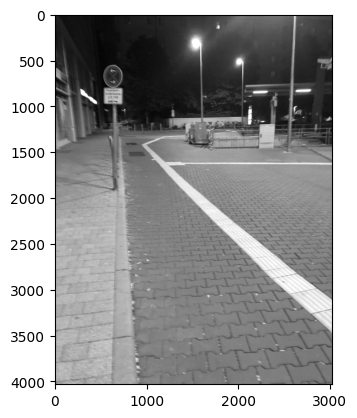

In [179]:
img_blur = cv2.GaussianBlur(gray_image, (5,5), 0)
plt.imshow(img_blur)



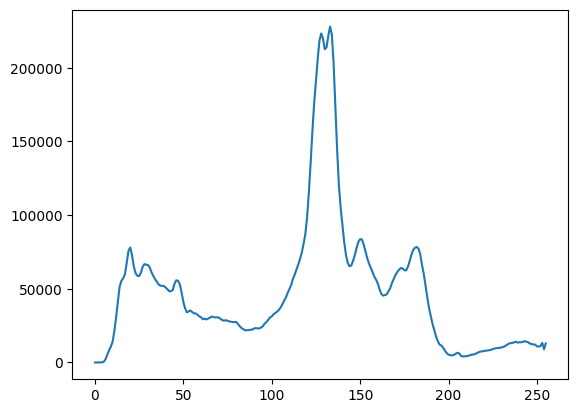

In [180]:
# Histogramm entlang der horizontalen Linie berechnen
histogram = cv2.calcHist([img_blur], [0], None, [256], [0, 256])

# Histogramm-Plot erstellen
plt.plot(histogram)

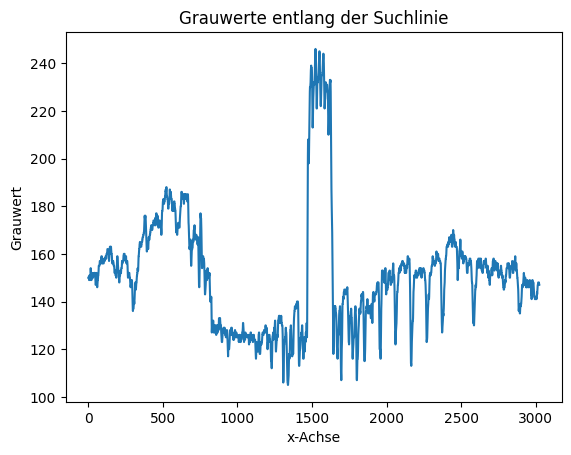

In [181]:
# def grayscale_values(image, y_position):
#     # Linienbild erstellen
#     #line_image = create_horizontal_line(image, y_position)

#     # x-Achse und Grauwerte initialisieren
#     x_values = np.arange(image.shape[1])
#     gray_values = []

#     # Grauwerte entlang der Linie sammeln
#     for x in x_values:
#         gray_values.append(image[y_position, x])

#     return gray_values, x_values


# # Plot erstellen
# def plot_values (gray_values, x_values):
#     plt.plot(x_values, gray_values)
#     plt.title('Grauwerte entlang der Suchlinie')
#     plt.xlabel('x-Achse')
#     plt.ylabel('Grauwert')
#     plt.show()

y_position = 2000

gray_values, x_values = grayscale_values(img_blur, y_position);
plot_values (gray_values, x_values)

In [182]:
print(img.shape[0])

4032


In [191]:

# def find_thresh (image, persentage):

#     h = image.shape[1]
#     all_grayscale_values = []
#     #x_values = []

#     for y in range(int(h/2), int(h), int(h/8)):
#         gray_values, x_values = grayscale_values(image, y)
#         all_grayscale_values.extend(gray_values)

#     max_gray = max(all_grayscale_values)
    
#     sorted_values = sorted(all_grayscale_values)  # Sortiere die Grauwerte aufsteigend
#     num_values = len(sorted_values)  # Anzahl der Grauwerte

#     thresh_percent = 1-persentage
    
#     index_1 = int(num_values * thresh_percent)  # Index für den 10% Punkt
#     threshold_2 = int(max_gray - (max_gray*persentage))

#     print(index_1)
   
#     threshold_1 = sorted_values[index_1]

#     return threshold_1, threshold_2



# def white_or_black (image, color):
     
#     if color == "w":
#         img_out = image
#     else:
#         if color == "s":
#             img_out = 255 - image
#         else:
#             raise ValueError("Ungültige Farbauswahl. Gültige Optionen sind 's' oder 'l'.")

#     return img_out

    
Farbe = "w"   #Farbe der Orientierungslinie wählen: w für weiß und s für schwarz

img_b_or_w = white_or_black(img_blur, Farbe)

thresh_1, thresh_2 = find_thresh(img_b_or_w, 0.13)

print("1:", thresh_1)
print("2:", thresh_2)

10523
1: 179
2: 220


uint8


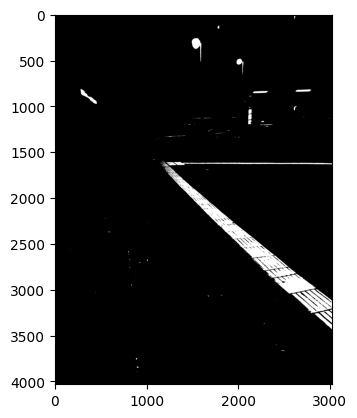

In [195]:
t, seg = cv2.threshold(img_b_or_w,thresh_2,255,cv2.THRESH_BINARY)
plt.imshow(seg)
print(seg.dtype)

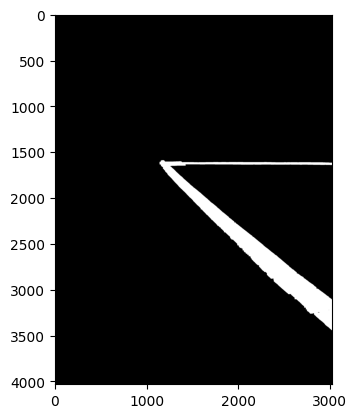

In [196]:
# def find_largest_component (image):
#         '''
#         find all connected Components, search for the largest
#         Output: Image with the largest Component
#         '''
#         # Finde alle zusammenhängenden Elemente
#         num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image)

#         # Finde das größte zusammenhängende Element
#         largest_component_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1

#         # Erstelle ein Bild, das nur das größte zusammenhängende Element enthält
#         largest_component_image = np.zeros_like(image)
#         largest_component_image[labels == largest_component_label] = 255

#         return largest_component_image

# def seg_largest_component(image):

#     # def find_largest_component (image):
#     #     '''
#     #     find all connected Components, search for the largest
#     #     Output: Image with the largest Component
#     #     '''
#     #     # Finde alle zusammenhängenden Elemente
#     #     num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_dilate)

#     #     # Finde das größte zusammenhängende Element
#     #     largest_component_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1

#     #     # Erstelle ein Bild, das nur das größte zusammenhängende Element enthält
#     #     largest_component_image = np.zeros_like(image)
#     #     largest_component_image[labels == largest_component_label] = 255

#     #     return largest_component_image
    


#     img_dilate = cv2.dilate(image.astype('uint8'), np.ones((3,3)), iterations=7)
#     #plt.imshow(img_dilate)

#     img_largest = find_largest_component(img_dilate)
#     #plt.imshow(img_largest)

#     #Um evtl. falsch verbundene Komponenten zu entfernen nocheinmal erode, find_largest_component, dilate
#     iterations_2 = 8

#     img_erode = cv2.erode(img_largest.astype('uint8'), np.ones((3,3)), iterations=iterations_2)
#     #plt.imshow(img_erode)

#     img_largest_2 = find_largest_component(img_erode)
#     #plt.imshow(img_largest_2)

#     img_out = cv2.dilate(img_largest_2.astype('uint8'), np.ones((3,3)), iterations= iterations_2*2)

#     return img_out


bw_seg = seg_largest_component(seg)
plt.imshow(bw_seg)

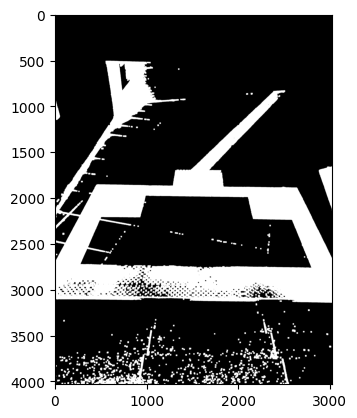

In [150]:
bw_new = cv2.dilate(seg.astype('uint8'), np.ones((3,3)), iterations=7)
plt.imshow(bw_new)

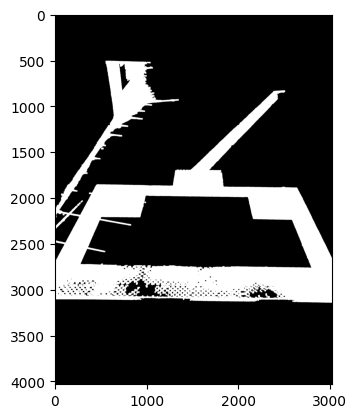

In [151]:
#bw_inv = 255-bw_new
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(bw_new)

# Finde das größte zusammenhängende Element
largest_component_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1

# Erstelle ein Bild, das nur das größte zusammenhängende Element enthält
largest_component_image = np.zeros_like(bw_new)
largest_component_image[labels == largest_component_label] = 255

plt.imshow(largest_component_image)

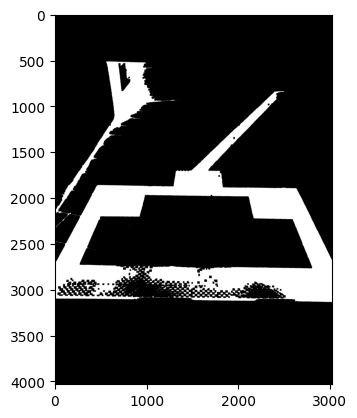

In [152]:
bw_erode = cv2.erode(largest_component_image.astype('uint8'), np.ones((3,3)), iterations=8)
plt.imshow(bw_erode)

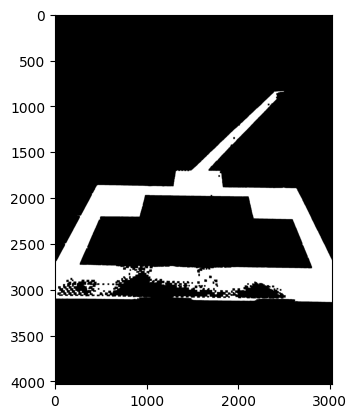

In [153]:
#bw_inv = 255-bw_new
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(bw_erode)

# Finde das größte zusammenhängende Element
largest_component_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1

# Erstelle ein Bild, das nur das größte zusammenhängende Element enthält
largest_component_image = np.zeros_like(bw_new)
largest_component_image[labels == largest_component_label] = 255

plt.imshow(largest_component_image)

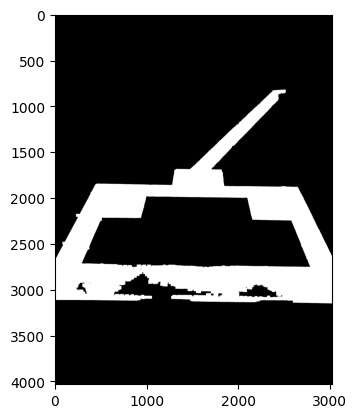

In [154]:
bw_seg_final = cv2.dilate(largest_component_image.astype('uint8'), np.ones((3,3)), iterations=15)
plt.imshow(bw_seg_final)

Docstring:
fitLine(points, distType, param, reps, aeps[, line]) -> line
.   @brief Fits a line to a 2D or 3D point set.
.   
.   The function fitLine fits a line to a 2D or 3D point set by minimizing \f$\sum_i \rho(r_i)\f$ where
.   \f$r_i\f$ is a distance between the \f$i^{th}\f$ point, the line and \f$\rho(r)\f$ is a distance function, one
.   of the following:
.   -  DIST_L2
.   \f[\rho (r) = r^2/2  \quad \text{(the simplest and the fastest least-squares method)}\f]
.   - DIST_L1
.   \f[\rho (r) = r\f]
.   - DIST_L12
.   \f[\rho (r) = 2  \cdot ( \sqrt{1 + \frac{r^2}{2}} - 1)\f]
.   - DIST_FAIR
.   \f[\rho \left (r \right ) = C^2  \cdot \left (  \frac{r}{C} -  \log{\left(1 + \frac{r}{C}\right)} \right )  \quad \text{where} \quad C=1.3998\f]
.   - DIST_WELSCH
.   \f[\rho \left (r \right ) =  \frac{C^2}{2} \cdot \left ( 1 -  \exp{\left(-\left(\frac{r}{C}\right)^2\right)} \right )  \quad \text{where} \quad C=2.9846\f]
.   - DIST_HUBER
.   \f[\rho (r) =  \fork{r^2/2}{if \(r < C\)}{C \cdo

475
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


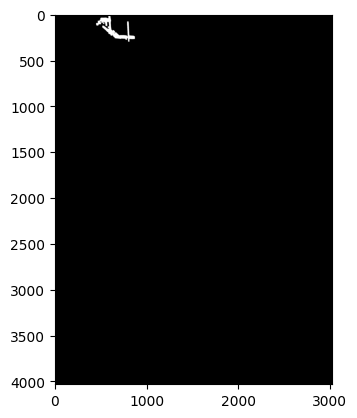

In [15]:
bw_new=(255-bw_new)
nr, labels = cv2.connectedComponents(bw_new)
bw_connect = np.zeros(img.shape)
bw_connect = (labels==1)
plt.imshow(bw_connect)
#plt.imshow(labels==1)

print(nr)
print(labels)

(4032, 3024, 3)

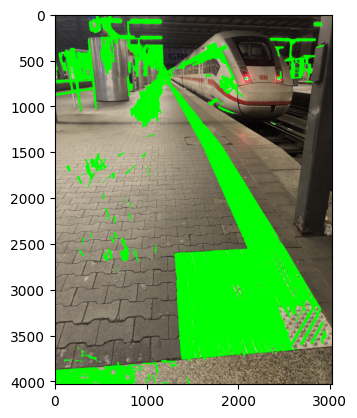

In [18]:
linesh = cv2.HoughLinesP(bw_new, 1, np.pi/180, 60,
                        minLineLength=50, maxLineGap=50)

lines=np.squeeze(linesh)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_2 = img.copy()
for (x1,y1,x2,y2) in lines:
    cv2.line(img_rgb, (x1,y1), (x2,y2), (0,255,0), 3)
plt.imshow(img_rgb)
img.shape

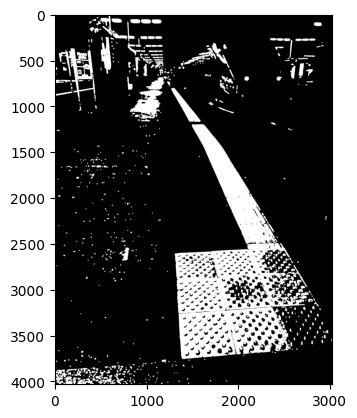

In [16]:
bw_new = cv2.dilate(seg ,np.ones((3,3)), iterations=4)
plt.imshow(bw_new)

1939
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


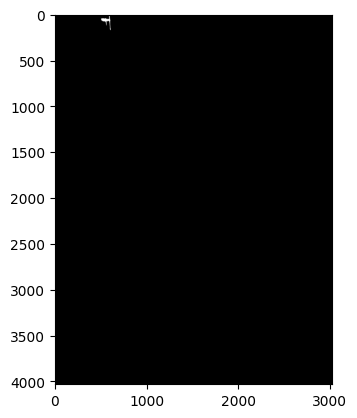

In [34]:
bw_new=(255-bw_new)
nr, labels = cv2.connectedComponents(seg)
bw_connect = (labels==1)
plt.imshow(bw_connect)

print(nr)
print(labels)

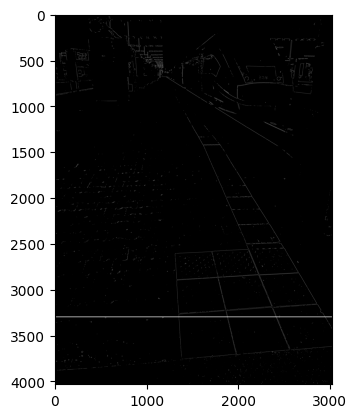

In [38]:
def create_horizontal_line(image, y_position, color=(255, 0, 0), thickness=5):
    line_image = np.array(image)
    cv2.line(line_image, (0, y_position), (image.shape[1], y_position), color, thickness)
    return line_image


y_position = 3300  # Y-Position der horizontalen Linie

line_image = create_horizontal_line(canny, y_position)

plt.imshow (line_image)

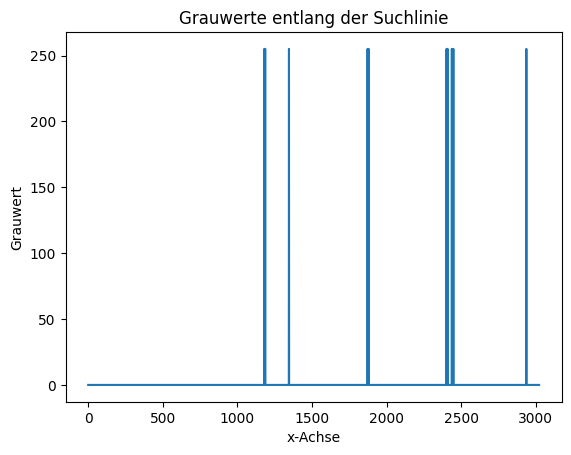

In [39]:
def grayscale_values(image, y_position):
    # Linienbild erstellen
    line_image = create_horizontal_line(image, y_position)

    # x-Achse und Grauwerte initialisieren
    x_values = np.arange(image.shape[1])
    gray_values = []

    # Grauwerte entlang der Linie sammeln
    for x in x_values:
        gray_values.append(image[y_position, x])

    return gray_values, x_values


# Plot erstellen
def plot_values (gray_values, x_values):
    plt.plot(x_values, gray_values)
    plt.title('Grauwerte entlang der Suchlinie')
    plt.xlabel('x-Achse')
    plt.ylabel('Grauwert')
    plt.show()

gray_values, x_values = grayscale_values(canny, y_position);
plot_values (gray_values, x_values)

Positionen der Änderungen:  [((2197, 1300), (2198, 1300)), ((1539, 1301), (1540, 1301), (2198, 1301), (2199, 1301), (2200, 1301)), ((2200, 1302), (2201, 1302)), ((1540, 1303), (1541, 1303), (2201, 1303), (2202, 1303), (2203, 1303)), ((1541, 1304), (1542, 1304), (2203, 1304), (2204, 1304), (2205, 1304)), ((2205, 1305), (2206, 1305)), ((2206, 1306), (2207, 1306), (2208, 1306)), ((1542, 1307), (1543, 1307), (2208, 1307), (2209, 1307), (2210, 1307)), ((1543, 1308), (1544, 1308), (2210, 1308), (2211, 1308), (2565, 1308)), ((2211, 1309), (2212, 1309), (2213, 1309), (2566, 1309)), ((1544, 1310), (1545, 1310), (2213, 1310), (2214, 1310), (2215, 1310)), ((2215, 1311), (2216, 1311)), ((1545, 1312), (1546, 1312), (2216, 1312), (2217, 1312), (2218, 1312)), ((1546, 1313), (1547, 1313), (2218, 1313), (2219, 1313)), ((2219, 1314), (2220, 1314), (2221, 1314)), ((1547, 1315), (1548, 1315), (2221, 1315), (2222, 1315), (2568, 1315), (2583, 1315)), ((858, 1316), (859, 1316), (2223, 1316), (2224, 1316), (2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


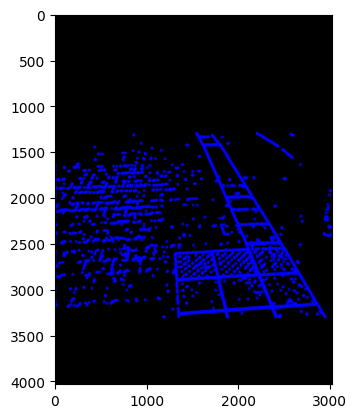

In [42]:

def detect_gray_value_changes(image, image_to_draw, y_position, min_distance, max_distance):
    
    # x-Achse und Grauwerte initialisieren
    x_values = np.arange(image.shape[1])
    gray_values = []

    # Grauwerte entlang der Linie sammeln
    for x in x_values:
        gray_values.append(image[y_position, x])

    # Grauwertänderungen und zugehörige x-Positionen sammeln
    change_positions_inrange = []
    change_positions = []
    #prev_value = gray_values[0]
    prev_position = 0

    for i in range(1, len(gray_values)):
        current_value = int(gray_values[i])
        if current_value == 255:
            if (i - prev_position) < max_distance:  #min_distance <
                change_positions_inrange.append((prev_position, y_position))
                change_positions_inrange.append((i, y_position))

            #change_positions.append((i, y_position))
            #prev_value = current_value
            prev_position = i  

    change_positions_sub =  tuple(set(change_positions_inrange))
    change_positions_sub = sorted(change_positions_sub, key=lambda point: point[0])

    # Nun nahe beiananderliegenede Punkte aus changes_position entfernen
    change_positions_wrong = []
    prev_x = 0
    for p in range(len(change_positions_sub)):
        current_x = change_positions_sub[p][0]
        current_y = change_positions_sub[p][1]
        
        if min_distance < (current_x-prev_x) < min_distance:
            #change_positions_wrong.append((prev_x, current_y))
            change_positions_wrong.append((current_x, current_y))

        prev_x = current_x

    change_positions_final = tuple(filter(lambda x: x not in change_positions_wrong, change_positions_sub))

    #Makiere die zulässigen Grauwertänderungen im ausgabe Bild
    img_out = image_to_draw
    for position in change_positions_final:
        cv2.circle(img_out, position, 10, (0, 0, 255), 10)

    return change_positions_final, change_positions_sub, img_out


#y_position = 2400
y_start = 1300
y_end = 3301
change_positions = []

img_dots = np.zeros(img.shape)

for y in range(y_start, y_end):
#Nach Grauwertänderungen suchen die sich in Ihrer x-Koordinate in einem Abstand 
# von 200 bis 350 Pixel befinden
    change_positions_current, change_positionskleiner, img_dots = detect_gray_value_changes(canny, img_dots, y, 200, 400)
    change_positions.append(change_positions_current)

    

print("Positionen der Änderungen: ", change_positions)
print("...", change_positionskleiner)
plt.imshow(img_dots)


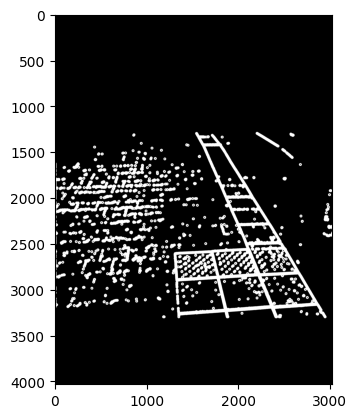

In [47]:
img_dots_gray = cv2.cvtColor(img_dots, cv2.COLOR_BGR2GRAY)
if img_dots_gray.dtype != np.uint8:
    img_dots_gray = img_dots_gray.astype(np.uint8)

plt.imshow(img_dots_gray)

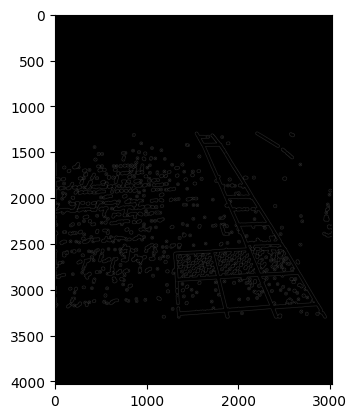

In [51]:
canny_dots = cv2.Canny(img_dots_gray, threshold1=250, threshold2=0)
plt.imshow(canny_dots)

(4032, 3024, 3)

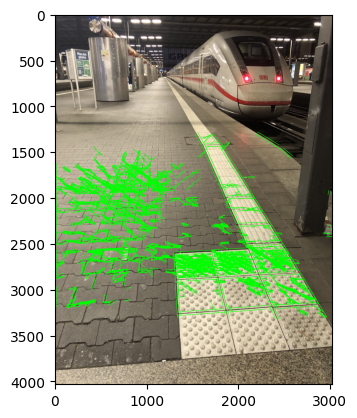

In [55]:
linesh = cv2.HoughLinesP(canny_dots, 1, np.pi/180, 60,
                        minLineLength=50, maxLineGap=50)

lines=np.squeeze(linesh)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_2 = img.copy()
for (x1,y1,x2,y2) in lines:
    cv2.line(img_rgb, (x1,y1), (x2,y2), (0,255,0), 3)
plt.imshow(img_rgb)
img.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


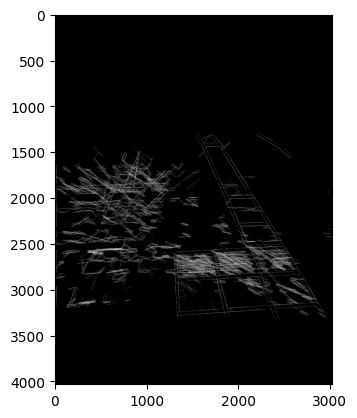

In [58]:
bw = np.zeros(np.shape(img))
for (x1,y1,x2,y2) in lines:
    cv2.line(bw, (x1,y1), (x2,y2), (255,255,255))
plt.imshow(bw)

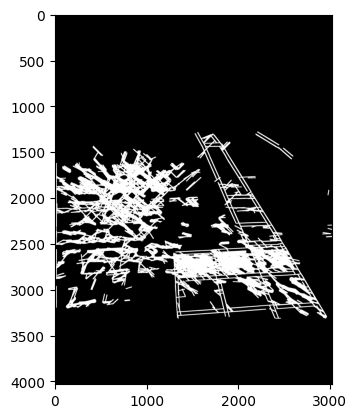

In [60]:
bw_new = cv2.dilate(bw ,np.ones((3,3)), iterations=4)
plt.imshow(bw_new)

In [63]:
bw_new=(255-bw_new)
nr, labels = cv2.connectedComponents(bw_new)
bw_connect = (labels==1) * 1
plt.imshow(bw_connect)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\connectedcomponents.cpp:5623: error: (-215:Assertion failed) L.channels() == 1 && I.channels() == 1 in function 'cv::connectedComponents_sub1'


In [59]:
bw = bw.astype("uint8")

nr, labels = cv2.connectedComponents(bw)
plt.imshow(labels == 1)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\connectedcomponents.cpp:5623: error: (-215:Assertion failed) L.channels() == 1 && I.channels() == 1 in function 'cv::connectedComponents_sub1'


[1.6233766233766234, 1.6611295681063123]
[-1404.2207792207791, -1573.089700996678]


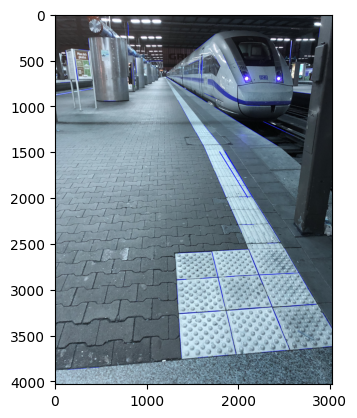

In [75]:
m = []
c = []
for i in range(2):
    out=cv2.line(img, change_positions1[-i], change_positions2[-i], (0, 0, 255), 6)

    #Steigung berechnen
    m.append((change_positions1[i][1]-change_positions2[i][1])/(change_positions1[i][0]-change_positions2[i][0]))
    #y-Schnittpunkt berechnen
    c.append(change_positions1[i][1] -m[i]*change_positions1[i][0])

    # Gerade1: y1 = m[0]*x1 + c[0]
    # Gerade2: y2 = m[1]*x2 + c[1]

print(m)
print(c)
plt.imshow(out)

In [9]:
def set_pixel_to_black(image, x, y):
    image[y, x] = np.zeros(3, dtype='uint8')  # Setze den Pixel auf Schwarz

    return image

set_pixel_to_black(img, 100, 100)

ValueError: setting an array element with a sequence.

In [ ]:
def set_pixels_to_zero(image, slope_left, intercept_left, slope_right, intercept_right, offset=50):
    height, width = image.shape
    
    for y in range(height):
        for x in range(width):
            if y <= (slope_left * x + intercept_left)-offset and y >= (slope_right * x + intercept_right)+offset:
                image[y, x] = [0, 0, 0]  # Setze den Pixel auf Schwarz
    
    return image

blacken_img = set_pixels_to_zero(img, m[0], c[0], m[1], c[1])

plt.imshow(blacken_img)

ValueError: setting an array element with a sequence.